In [34]:
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, auc, confusion_matrix, precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, classification_report
from sklearn.model_selection import GridSearchCV


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
X, Y = make_moons()
X

array([[ 1.28681296e-01,  9.28244800e-03],
       [-5.72116660e-01,  8.20172255e-01],
       [-3.45365054e-01,  9.38468422e-01],
       [ 1.09602303e+00, -4.95379113e-01],
       [ 1.61911895e-01, -4.55349012e-02],
       [ 3.76510198e-01, -2.81831482e-01],
       [ 1.83808810e+00, -4.55349012e-02],
       [ 1.22252093e+00, -4.74927912e-01],
       [ 5.95216657e-01, -4.14412623e-01],
       [ 1.92691676e+00,  1.24732995e-01],
       [ 6.72300890e-01,  7.40277997e-01],
       [ 5.37461710e-01, -3.86599306e-01],
       [-9.00968868e-01,  4.33883739e-01],
       [ 3.45365054e-01,  9.38468422e-01],
       [ 5.72116660e-01,  8.20172255e-01],
       [ 0.00000000e+00,  5.00000000e-01],
       [-6.72300890e-01,  7.40277997e-01],
       [ 1.03205158e+00, -4.99486216e-01],
       [ 6.54634946e-01, -4.38468422e-01],
       [ 8.71318704e-01,  4.90717552e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-9.49055747e-01,  3.15108218e-01],
       [-3.20515776e-02,  9.99486216e-01],
       [-1.

Розглянемо графік функції

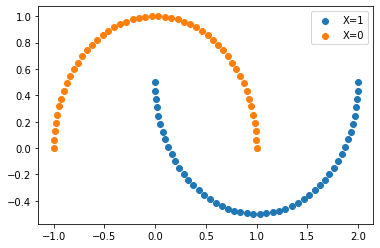

In [36]:
X_1 = X[Y==1]
X_0 = X[Y==0]
plt.scatter(X_1[:, 0], X_1[:, 1], label="X=1")
plt.scatter(X_0[:, 0], X_0[:, 1], label="X=0")
plt.legend()

Центруємо наші дані

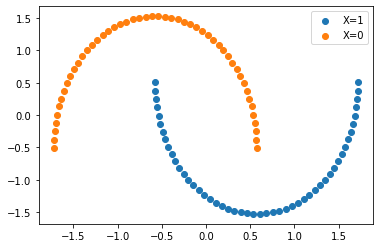

In [37]:
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
X_1 = X[Y==1]
X_0 = X[Y==0]
plt.scatter(X_1[:, 0], X_1[:, 1], label="X=1")
plt.scatter(X_0[:, 0], X_0[:, 1], label="X=0")
plt.legend()

Навчимо LinearSVC на центрованій вибірці

(2500,)


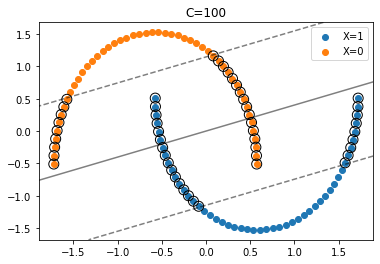

In [38]:
clf1 = LinearSVC(C=100, max_iter=10000000).fit(X, Y)
decision_function = clf1.decision_function(X)
X_1 = X[Y==1]
X_0 = X[Y==0]
support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]
plt.scatter(X_1[:, 0], X_1[:, 1], label="X=1")
plt.scatter(X_0[:, 0], X_0[:, 1], label="X=0")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                 np.linspace(ylim[0], ylim[1], 50))
Z = clf1.decision_function(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
plt.legend()
plt.title(f"C=100")
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

Все погано, давайте перевіримо це

Виконаємо 5fold крос-валідацію

In [39]:
clf = LinearSVC(C=100, max_iter=10000000)
cross_val_score(clf, X, Y)

array([0.95, 1.  , 0.9 , 0.7 , 0.85])

Порахуємо метрики

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [41]:
recall_score(Y_test, Y_pred)

0.8125

In [42]:
precision_score(Y_test, Y_pred)

0.9285714285714286

In [43]:
confusion_matrix(Y_test, Y_pred)

array([[16,  1],
       [ 3, 13]])

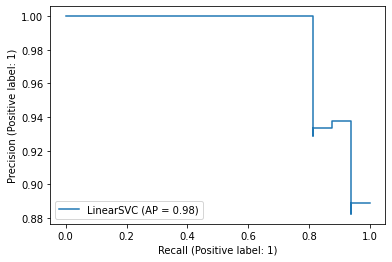

In [44]:
PrecisionRecallDisplay.from_estimator(clf, X_test, Y_test)

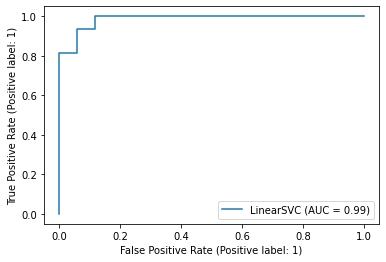

In [45]:
RocCurveDisplay.from_estimator(clf, X_test, Y_test)

Побудуємо для тієї самої центрованої вибірки SVC зі значеннями ядра linear та poly

In [46]:
clf_lin = SVC(kernel="linear", C=100)
clf_poly = SVC(kernel="poly", C=10)
cross_val_score(clf_poly, X, Y)

array([0.95, 1.  , 0.9 , 0.85, 0.85])

In [47]:
cross_val_score(clf_lin, X, Y)

array([0.95, 1.  , 0.9 , 0.7 , 0.85])

(2500,)


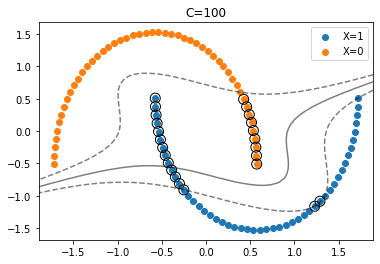

In [48]:
clf_poly.fit(X_train, Y_train)
decision_function = clf_poly.decision_function(X)
X_1 = X[Y==1]
X_0 = X[Y==0]
support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]
plt.scatter(X_1[:, 0], X_1[:, 1], label="X=1")
plt.scatter(X_0[:, 0], X_0[:, 1], label="X=0")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                 np.linspace(ylim[0], ylim[1], 50))
Z = clf_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
plt.legend()
plt.title(f"C=100")
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

In [49]:
clf_poly.fit(X_train, Y_train)
Y_pred = clf_poly.predict(X_test)

In [50]:
confusion_matrix(Y_test, Y_pred)

array([[17,  0],
       [ 3, 13]])

In [51]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.81      0.90        16

    accuracy                           0.91        33
   macro avg       0.93      0.91      0.91        33
weighted avg       0.92      0.91      0.91        33



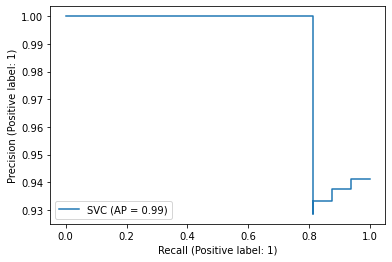

In [52]:
PrecisionRecallDisplay.from_estimator(clf_poly, X_test, Y_test)

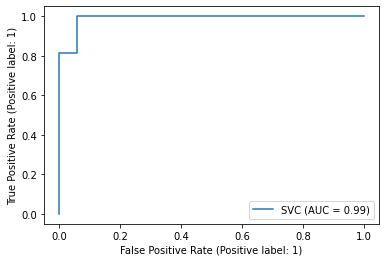

In [53]:
RocCurveDisplay.from_estimator(clf_poly, X_test, Y_test)

In [54]:
clf_lin.fit(X_train, Y_train)
Y_pred = clf_lin.predict(X_test)

In [55]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.93      0.81      0.87        16

    accuracy                           0.88        33
   macro avg       0.89      0.88      0.88        33
weighted avg       0.88      0.88      0.88        33



In [56]:
confusion_matrix(Y_test, Y_pred)

array([[16,  1],
       [ 3, 13]])

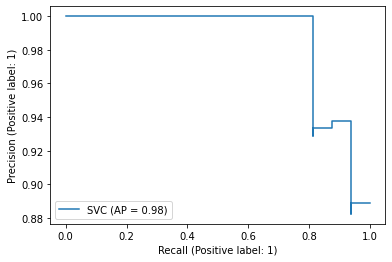

In [57]:
PrecisionRecallDisplay.from_estimator(clf_lin, X_test, Y_test)

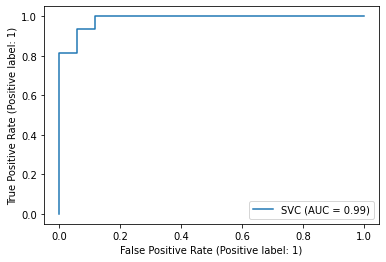

In [58]:
RocCurveDisplay.from_estimator(clf_lin, X_test, Y_test)

Виконаємо grid-search для параметрів C, degree, probability 

In [66]:
params = {'kernel':['poly', 'rbf', 'linear'], 'probability':(True, False), 'C':[1, 10, 100, 1000, 10_000], 'degree': [1,3,5,7,9,11]}
clf_searched = SVC()
gs_clf = GridSearchCV(clf_searched, params)
gs_clf.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'degree': [1, 3, 5, 7, 9, 11],
                         'kernel': ['poly', 'rbf', 'linear'],
                         'probability': (True, False)})

In [67]:
gs_clf.best_params_

{'C': 10, 'degree': 1, 'kernel': 'rbf', 'probability': True}

(2500,)


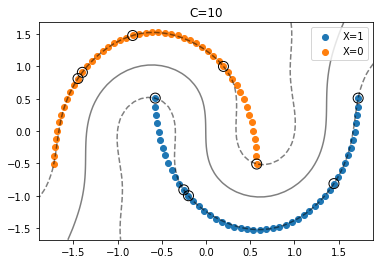

In [68]:
decision_function = gs_clf.decision_function(X)
X_1 = X[Y==1]
X_0 = X[Y==0]
support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]
plt.scatter(X_1[:, 0], X_1[:, 1], label="X=1")
plt.scatter(X_0[:, 0], X_0[:, 1], label="X=0")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                 np.linspace(ylim[0], ylim[1], 50))
Z = gs_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
plt.legend()
plt.title(f"C={gs_clf.best_params_['C']}")
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

In [63]:
Y_best_pred = gs_clf.predict(X_test)

In [64]:
confusion_matrix(Y_test, Y_best_pred)

array([[17,  0],
       [ 0, 16]])

In [65]:
print(classification_report(Y_test, Y_best_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

